## Response Curve

In [ ]:
# Creating DataFrames
df_spend = pd.read_csv("C:\\Users\\DeepakArun\\Documents\\Desktop\\Robyn_202407301323_init\\pareto_media_transform_matrix.csv")
df_target = pd.read_csv("C:\\Users\\DeepakArun\\Documents\\Desktop\\Robyn_202407301323_init\\pareto_alldecomp_matrix.csv")

# Set modelID to filter
modelID = '1_1550_2'

# Call the function
df_response_curve = prepare_response_curve_data(modelID, df_spend, df_target)


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def prepare_response_curve_data(modelID, df_spend, df_target):
    # df_spend: pareto_media_transform_matrix
    # df_target: pareto_alldecomp_matrix
    df_spend = df_spend[df_spend['solID'] == modelID]
    df_spend = df_spend[df_spend['type'] == 'saturatedSpendReversed']
    df_target = df_target[df_target['solID'] == modelID]
    subset = [cols for cols in list(df_spend.columns) if 'spend' in cols.lower()]
    df_response_curve = pd.DataFrame(columns=['channel', 'date', 'spend_total', 'target_total'])
    for cols in subset:
        df_spend_temp = df_spend[['ds', cols]]
        df_spend_temp = df_spend_temp.rename({'ds': 'date', cols: 'spend_total'}, axis=1)
        df_target_temp = df_target[['ds', cols]]
        df_target_temp = df_target_temp.rename({'ds': 'date', cols: 'target_total'}, axis=1)
        df_temp = pd.merge(df_spend_temp, df_target_temp, on='date')
        df_temp['channel'] = cols
        df_response_curve = pd.concat([df_response_curve, df_temp])
    return df_response_curve

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

def thousands_formatter(x, pos):
    return f'{x / 1e3:.0f}k'

def overall_response_curve(model_df, spend_chart_limit=None, target_chart_limit=None):
    """
    model_df: dataframe containing response curve values
    spend_chart_limit: if x-axis has to be limited to certain spend like $25K
    target_chart_limit: if y-axis has to be limited to certain target like 2M
    """
    color_list = ['#702963', '#0E4C92', '#808000', '#FB9AD1', '#3E424B', '#FFBD33', '#00A9FF', '#65451F', '#e6194B', '#469990', '#f58231', '#000000']
    channel_itr = [
        'Brand_Spend',
        'Preload_Digital_Turbine_Spend',
        'Preload_IronSource_Aura_Spend',
        'Programmatic_Bidease_Spend',
        'Programmatic_IronSource_Sonic_Spend',
        'Programmatic_LiftOff_Spend',
        'Programmatic_Persona.ly_Spend',
        'Programmatic_Tapjoy_Spend',
        'SEM_Apple_Search_Ads_Spend',
        'SEM_Google_Spend',
        'Twitter_TikTok_Combined_Spend',
        'Influencer_Spend'
    ]
    channel_list = [
        'Brand',
        'Preload Digital Turbine',
        'Preload IronSource Aura',
        'Programmatic Bidease',
        'Programmatic IronSource Sonic',
        'Programmatic LiftOff',
        'Programmatic Persona.ly',
        'Programmatic Tapjoy',
        'SEM Apple Search Ads',
        'SEM Google',
        'Twitter & TikTok Combined',
        'Influencer Spend'
    ]
    print("*** Generating Response Curve for channel: ***")
    model_df_ = model_df.copy()
    if spend_chart_limit is not None:
        model_df_ = model_df_[model_df_['spend_total'] <= spend_chart_limit]
    if target_chart_limit is not None:
        model_df_ = model_df_[model_df_['target_total'] <= target_chart_limit]
    counter = 0
    for ch in channel_itr:
        print(channel_list[counter])
        df_temp = model_df_[model_df_['channel'] == ch].reset_index().sort_values('spend_total')
        avg_spend = df_temp['spend_total'].mean()
        closest_point = df_temp.iloc[(df_temp['spend_total'] - avg_spend).abs().argsort()[:1]]
        
        sns.lineplot(data=df_temp, x='spend_total', y='target_total', label=channel_list[counter], color=color_list[counter])
        plt.scatter(closest_point['spend_total'], closest_point['target_total'], marker='o', color=color_list[counter], s=25, label=f'Avg Spend ({avg_spend:.2f})')
        
        plt.gca().yaxis.set_major_formatter(millions_formatter)
        plt.gca().xaxis.set_major_formatter(thousands_formatter)
        counter += 1
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Spend')
    plt.ylabel('Response (Visits)')
    plt.show()

def check_value_scale(value):
    max_val = max(value)
    if max_val >= 1_000_000:
        return "millions"
    elif max_val >= 1_000:
        return "thousands"
    else:
        return "unknown"
    
# Individual response curve
def individual_response_curve(model_df, spend_chart_limit=None, target_chart_limit=None):
    """
    model_df: dataframe containing response curve values
    spend_chart_limit: if x-axis has to be limited to certain spend like $25K
    target_chart_limit: if y-axis has to be limited to certain target like 2M
    """
    color_list = ['#702963', '#0E4C92', '#808000', '#FB9AD1', '#3E424B', '#FFBD33', '#00A9FF', '#65451F', '#e6194B', '#469990', '#f58231',"#000000"]
    channel_itr = ['Brand_Spend',
                   'Preload_Digital_Turbine_Spend',
                   'Preload_IronSource_Aura_Spend',
                   'Programmatic_Bidease_Spend',
                   'Programmatic_IronSource_Sonic_Spend',
                   'Programmatic_LiftOff_Spend',
                   'Programmatic_Persona.ly_Spend',
                   'Programmatic_Tapjoy_Spend',
                   'SEM_Apple_Search_Ads_Spend',
                   'SEM_Google_Spend',
                   'Twitter_TikTok_Combined_Spend',
                  'Influencer_Spend']
    channel_list = ['Brand',
                    'Preload Digital Turbine',
                    'Preload IronSource Aura',
                    'Programmatic Bidease',
                    'Programmatic IronSource Sonic',
                    'Programmatic LiftOff',
                    'Programmatic Persona.ly',
                    'Programmatic Tapjoy',
                    'SEM Apple Search Ads',
                    'SEM Google',
                    'Twitter & TikTok Combined',
                   'Influencer Spend']
    print("*** Generating Response Curve for channel: ***")
    model_df_ = model_df.copy()
    if spend_chart_limit is not None:
        model_df_ = model_df_[model_df_['spend_total'] <= spend_chart_limit]
    if target_chart_limit is not None:
        model_df_ = model_df_[model_df_['target_total'] <= target_chart_limit]
    counter = 0
    for ch in channel_itr:
        print(channel_list[counter])
        df_temp = model_df_[model_df_['channel'] == ch].reset_index().sort_values('spend_total')
        sns.lineplot(data=df_temp, x='spend_total', y='target_total', label=channel_list[counter], color=color_list[counter])
        plt.gca().xaxis.set_major_formatter(thousands_formatter)
        
        avg_spend = df_temp['spend_total'].mean()
        closest_point = df_temp.iloc[(df_temp['spend_total'] - avg_spend).abs().argsort()[:1]]
        plt.scatter(closest_point['spend_total'], closest_point['target_total'], marker='o', color=color_list[counter], s=100)
        
        plt.legend(loc='upper left')
        plt.xlabel('Spend')
        plt.ylabel('Response (Visits)')
        title = 'Response Curve: ' + channel_list[counter]
        plt.title(title)
        
        scale = check_value_scale(df_temp['target_total'])
        if scale == "millions":
            plt.gca().yaxis.set_major_formatter(millions_formatter)
        elif scale == "thousands":
            plt.gca().yaxis.set_major_formatter(thousands_formatter)
        
        counter = counter + 1
        plt.show()


*** Generating Response Curve for channel: ***
Brand
Preload Digital Turbine
Preload IronSource Aura
Programmatic Bidease
Programmatic IronSource Sonic
Programmatic LiftOff
Programmatic Persona.ly
Programmatic Tapjoy
SEM Apple Search Ads
SEM Google
Twitter & TikTok Combined


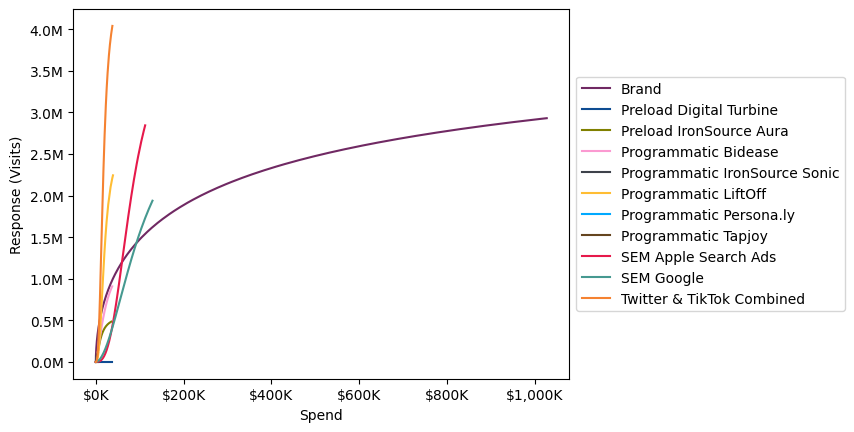

In [17]:
model_df = df_response_curve
overall_response_curve(model_df, spend_chart_limit=None, target_chart_limit = None)

In [ ]:
model_df = df_response_curve
individual_response_curve(model_df, spend_chart_limit=None, target_chart_limit = None)

## Area Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pareto_decomp_df = pd.read_csv("C:\\Users\\DeepakArun\\Documents\\Desktop\\Robyn_202407301323_init\\pareto_alldecomp_matrix.csv")
pareto_decomp_df = pareto_decomp_df[pareto_decomp_df['solID']=='1_1550_2']
pareto_decomp_df['ds'] = pd.to_datetime(pareto_decomp_df['ds']).dt.strftime('%Y-%m-%d')
pareto_decomp_df=pareto_decomp_df.drop(['Unnamed: 0', 'solID',
       'cluster', 'top_sol'], axis=1)
base_cols = ['trend', 'season', 'holiday', 'Preference',
      'US_Weather_Impact_Rating', 
             'Net_Trust',
            # 'Positive.impact.on.community',
             'NPS',
       'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 
             'intercept']
print(len(base_cols))
organic_cols = ['OrganicSearch_Google_Clicks',
       'SocialEng_Twitter_Total_Engagements',
       'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions',
       'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks',
       'SocialEng_Instagram_Estimated_Clicks'
               ]
print(len(organic_cols))
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend',
       'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend',
       'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend',
       'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend',
       'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend',
       'Brand_Spend', 'Influencer_Spend']
print(len(paid_media_cols))

OrganicSearch_Google_Clicks, SocialEng_Twitter_Total_Engagements, SocialEng_Facebook_Estimated_Clicks, SocialEng_LinkedIn_Impressions,SocialEng_TikTok_Impressions, SocialEng_YouTube_Estimated_Clicks, SocialEng_Instagram_Estimated_Clicks



In [ ]:
pareto_decomp_df['Base'] = pareto_decomp_df[base_cols].sum(axis=1)
pareto_decomp_df['Organic'] = pareto_decomp_df[organic_cols].sum(axis=1)
pareto_decomp_df['Paid_Media'] = pareto_decomp_df[paid_media_cols].sum(axis=1)

area_chart_df = pareto_decomp_df[['ds','Base','Organic','Paid_Media']].reset_index(drop=True)



In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

def plot_pct_orders_heat_map(df, x, y_base, y_organic, y_media, title="", fig_label="", save_dir=""):
    """
    Plot pct of base, organic, and paid media orders.
    Displays average pct for pct_base, organic, and paid media on the right side y-axis with a dotted horizontal line,
    and prints the avg pct values for base, organic, and media directly on the right side y-axis.

    Params:
        df: DataFrame - The data frame to plot.
        x: str - Column to plot on x_axis.
        y_base: str - Column for pct orders from base vars.
        y_organic: str - Column for pct orders from organic vars.
        y_media: str - Column for pct orders from media vars.
        title: str - Title for the plot.
        fig_label: str - Label/name for the plot.
        save_dir: str - Path to save the plot.
    """
    # Ensure the specified columns exist in the DataFrame
    assert all(c in df.columns for c in [x, y_base, y_organic, y_media])

    # Ensure x is a datetime column
    df[x] = pd.to_datetime(df[x])
    # Rename the x column to 'Date' for consistency
    df = df.rename({x: 'Date'}, axis=1)
    x = 'Date'  # Update x to refer to the renamed column
    df_plot = df.copy()

    # Sort df_plot by x to ensure the dates are in order
    df_plot.sort_values(by=x, inplace=True)

    # Calculate combined percentages
    df_plot["pct_base_organic"] = df_plot[y_base] + df_plot[y_organic]
    df_plot["all"] = df_plot[y_base] + df_plot[y_organic] + df_plot[y_media]
    # Ensure that the combined percentage does not exceed 1.0
    df_plot["all"] = np.where(df_plot["all"] > 1.0, 1.0, df_plot["all"])

    # Calculate averages
    avg_base = df_plot[y_base].mean()
    avg_organic = df_plot[y_organic].mean()
    avg_media = df_plot[y_media].mean()
    avg_organic_line = df_plot["pct_base_organic"].mean()
    avg_media_line = df_plot["all"].mean()

    # Create the plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    ax2 = axs.twinx()  # Create a second y-axis to display the average values

    # Plot lines for base, organic, and all percentages
    sns.lineplot(data=df_plot, x=x, y=y_base, color="blue", ax=axs)
    sns.lineplot(data=df_plot, x=x, y="pct_base_organic", color="orange", ax=axs)
    sns.lineplot(data=df_plot, x=x, y="all", color="green", ax=axs)

    # Adding horizontal lines for averages on the main y-axis
    axs.axhline(y=avg_base, color="blue", linestyle="--", label=f"Average {y_base}")
    axs.axhline(y=avg_organic_line, color="orange", linestyle="--", label="Average Organic")
    axs.axhline(y=avg_media_line, color="green", linestyle="--", label=f"Average {y_media}")

    # Format x-axis to display dates correctly
    axs.xaxis.set_major_locator(mdates.AutoDateLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    plt.xticks(rotation=0)  # Set rotation for x-axis labels
    fig.autofmt_xdate()  # Auto format date labels for readability

    # Fill areas between the lines for visual distinction
    plt.fill_between(df_plot[x], df_plot[y_base], df_plot["pct_base_organic"], color="orange", alpha=0.5)
    plt.fill_between(df_plot[x], df_plot["pct_base_organic"], df_plot["all"], color="green", alpha=0.5)
    plt.fill_between(df_plot[x], df_plot[y_base], color="blue", alpha=0.5)

    # Setting the average values on the right y-axis
    ax2.set_yticks([avg_base, avg_organic_line, avg_media_line])
    ax2.set_yticklabels([f"Avg Base {avg_base:.2%}", f"Avg Organic {avg_organic:.2%}", f"Avg Media {avg_media:.2%}"])
    ax2.set_ylim(axs.get_ylim())  # Ensure the right y-axis aligns with the left y-axis

    # Set axis labels and title
    plt.xlabel('Date')
    plt.ylabel('Percentage')

    # Set legend and title
    axs.legend(loc="upper left")
    axs.set_title(title, fontsize=16, fontdict={"weight": "normal"}, loc="left")

    # Save the plot if a save directory is specified
    if save_dir:
        plt.savefig(f"{save_dir}/{fig_label}.png", bbox_inches="tight", transparent=False)
        plt.close()

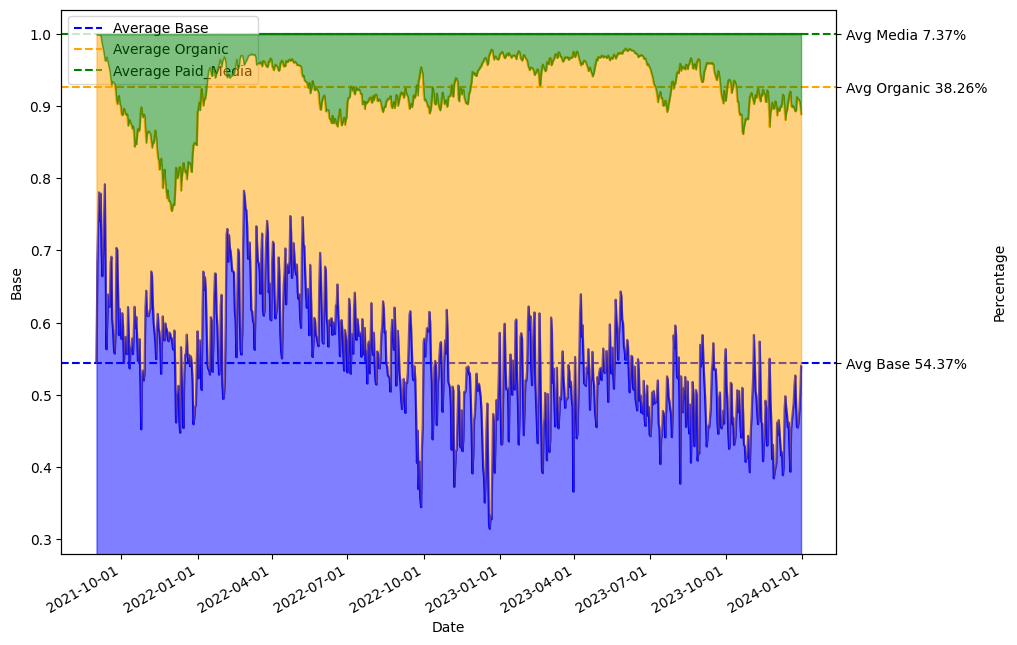

In [16]:
import numpy as np
import matplotlib.dates as mdates

# Importing the data
df_percentage = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Area Chart.xlsx") #File location is to be changed

# Calling the function
plot_pct_orders_heat_map(
    df_percentage, 'ds', 'Base', 'Organic', 'Paid_Media', title="", fig_label="", save_dir=""
)